<a href="https://colab.research.google.com/github/Alenushka2013/Coursera/blob/master/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22TimeSeries_bootcamp_HT1_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание

В этом домашнем задании предлагаем вам попрактиковаться в прогнозировании стоимости биткоина при помощи линейной регрессии.

In [96]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error

data = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_applied_tasks/main/datasets/BTC_5min_sample.csv",
                   parse_dates=True,
                   index_col='timestamp'
                  )

data.head()

,open,high,low,close,volume
timestamp,,,,,
2023-06-18 00:00:00,26519.10,26542.5,26501.76,26515.80,35.4498
2023-06-18 00:05:00,26508.01,26535.0,26506.13,26511.30,7.4262
2023-06-18 00:10:00,26511.30,26551.0,26508.77,26519.62,18.9461
2023-06-18 00:15:00,26519.44,26550.0,26464.43,26511.99,89.2364
2023-06-18 00:20:00,26513.33,26541.0,26414.28,26439.52,90.0204


Будем прогнозировать стоимость биткоина на момент открытия торгов (`open`).

<Axes: xlabel='timestamp'>

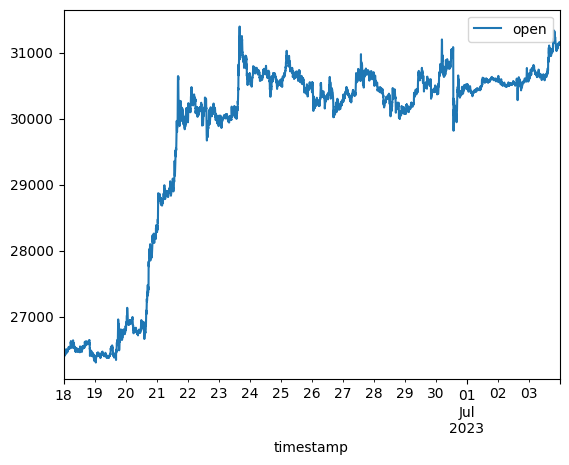

In [97]:
data = data[['open']]

data.plot()

Проделайте следующие шаги:

* Разбейте данные на тренировочную и тестовую часть. В тест отправьте 15% данных

* Извлеките лаговые признаки

* Извлеките агрегированные признаки (средняя стоимость за день, час)

Рекомендуется использовать функцию preprocess_data с вебинара (однако, надо будет незначительно ее поменять, исходя из данных задачи).

Задайте гиперпараметры по умолчанию (в функции preprocess_data, если будете использовать ее):
* `lag_start`=5
* `lag_end`=20
* `test_size`=0.15

In [98]:
def code_mean(data, cat_feature, real_feature):
    return dict(data.groupby(cat_feature)[real_feature].mean())

In [116]:
def preprocess_data(data, lag_start=5, lag_end=20, test_size=0.15):

    # your code here
    data = pd.DataFrame(data.copy())
    date_cut = data.iloc[int(data.shape[0]*0.85)].name

    # добавляем лаги исходного ряда в качестве признаков
    for i in range(lag_start, lag_end):
        data[f"lag_{i}"] = data['open'].shift(i)

    data = data.dropna()

    data['hour'] = data.index.hour # вытаскиваем минуты из времени
    train_mean = code_mean(data[:date_cut], 'hour', 'open') # берём среднее только по train, чтобы не было утечки
    data['mean_open_hour'] = data['hour'].apply(lambda x: train_mean[x]) # в качестве нового признака возьмем std по минутам
    data.drop('hour', axis = 1, inplace = True)

    # всё тоже самое, но для дня недели (брать дни месяца беполезно, потому что у нас всего один месяц в данных)
    data['dayofweek'] = data.index.dayofweek
    train_mean = code_mean(data[:date_cut], 'dayofweek', 'open')
    data['dayofweek_mean'] = data['dayofweek'].apply(lambda x: train_mean[x])
    data.drop('dayofweek', axis = 1, inplace = True)
    train =  data.loc[:date_cut]
    test = data.loc[date_cut:]

    X_train = train.drop('open', axis = 1)
    y_train = train['open']
    X_test = test.drop('open', axis = 1)
    y_test = test['open']

    return X_train, X_test, y_train, y_test



In [117]:
X_train, X_test, y_train, y_test = preprocess_data(data)

X_train.shape, X_test.shape

((3898, 17), (692, 17))

Обучите линейную регрессию с гиперпараметрами по умолчанию на тренировочных данных и вычислите ошибку MAE на тестовых данных.

Чему она получилась равна? (Ответ округлите до целого числа).

Также нарисуйте график правильного ответа и прогноза на тесте.

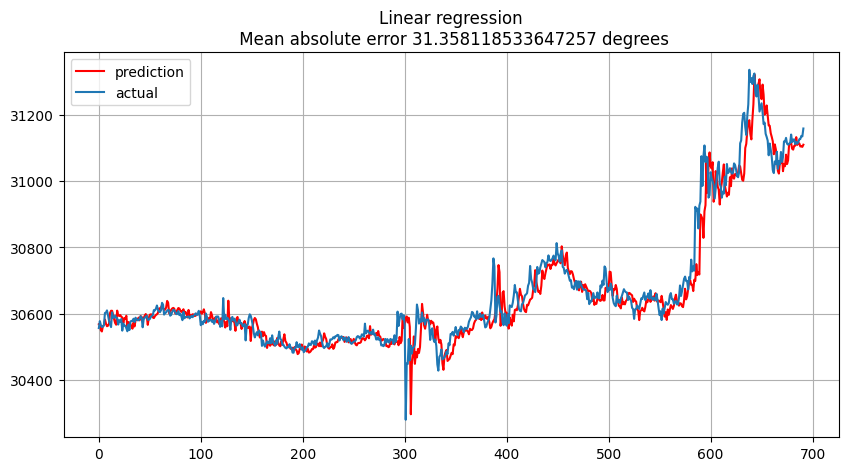

In [118]:
# your code here
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

preds = lr.predict(X_test)

plt.figure(figsize=(10, 5))
plt.plot(preds, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.grid(True)
plt.legend(loc="best")
plt.title(f"Linear regression\n Mean absolute error {mean_absolute_error(preds, y_test)} degrees");

Попробуйте подобрать гиперпараметры `lag_start`, `lag_end`, а также придумать новые полезные агрегрированные признаки для улучшения качества прогноза.

Пропорции разбиения (в тесте 15% данных) не трогайте. Ошибку MAE все так же считайте на тесте.

In [ ]:
# your code here